kaggle 影像辨識訓練資料庫

https://www.kaggle.com/

Teachable Machine 是 Google 所推出的無程式碼機器學習平台

https://teachablemachine.withgoogle.com/

# 影像整理

In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPool2D

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
train_dir = '/content/drive/MyDrive/2023聯成電腦/Python IV 視覺辨識與機器學習/0220/dog_cat/train'
path = os.path.join(train_dir)
path

'/content/drive/MyDrive/2023聯成電腦/Python IV 視覺辨識與機器學習/0220/dog_cat/train'

In [9]:
X = list()
y = list()

In [10]:
# 轉換: 如果文字是dog的時候(成立)，轉換成整數
convert = lambda category: int(category == 'dog')

In [11]:
# 範例解釋
classes = convert('dog') # 轉換出來為布林值 1 True 0 False
classes

1

In [12]:
classes = convert('cat')
classes

0

In [13]:
def create_class(path):
  for p in os.listdir(path):
    # 上面轉換後 dog 為1, cat 為0
    category = p.split('.')[0] # 抓取切割後的第0個 => 種類
    category = convert(category)
    img_arr = cv2.imread(os.path.join(path, p), 0)
    new_img = cv2.resize(img_arr, dsize=(100,100))
    # 題目
    X.append(new_img)
    # 答案
    y.append(category)

In [14]:
create_class(path)

In [15]:
len(X)

405

In [16]:
len(y)

405

In [17]:
len(X[0])

100

array([[248, 252, 253, ..., 189, 198, 201],
       [248, 246, 243, ..., 182, 181, 176],
       [167, 187, 183, ..., 190, 186, 193],
       ...,
       [149, 156, 160, ..., 117, 112, 108],
       [151, 153, 155, ..., 112, 111, 108],
       [148, 150, 156, ..., 111, 109, 107]], dtype=uint8)
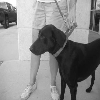

In [18]:
X[0]

In [19]:
X = np.array(X).reshape(-1, 100, 100, 1)
y = np.array(y)

# 收斂
X = X / 255

# OneHot
from tensorflow.python.keras.utils import np_utils
y_train = np_utils.to_categorical(y)

In [20]:
y_train[0]

array([0., 1.], dtype=float32)

# 建模

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=X.shape[1:], activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
#model.add(Dense(1, activation='sigmoid')) # 瞬間遺失太多會造成 accuracy卡住
model.add(Dense(2, activation='softmax'))

# 編譯

In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 訓練

In [24]:
model.fit(X, y_train, epochs=20, batch_size=32)

Epoch 1/20
13/13 [==============================] - 9s 75ms/step - loss: 0.7282 - accuracy: 0.4691
Epoch 2/20
13/13 [==============================] - 0s 26ms/step - loss: 0.6951 - accuracy: 0.4716
Epoch 3/20
13/13 [==============================] - 0s 26ms/step - loss: 0.6930 - accuracy: 0.4938
Epoch 4/20
13/13 [==============================] - 0s 26ms/step - loss: 0.6906 - accuracy: 0.5531
Epoch 5/20
13/13 [==============================] - 0s 26ms/step - loss: 0.6820 - accuracy: 0.5432
Epoch 6/20
13/13 [==============================] - 0s 27ms/step - loss: 0.6649 - accuracy: 0.6000
Epoch 7/20
13/13 [==============================] - 0s 26ms/step - loss: 0.6337 - accuracy: 0.6296
Epoch 8/20
13/13 [==============================] - 0s 26ms/step - loss: 0.6089 - accuracy: 0.6988
Epoch 9/20
13/13 [==============================] - 0s 27ms/step - loss: 0.5755 - accuracy: 0.6667
Epoch 10/20
13/13 [==============================] - 0s 26ms/step - loss: 0.5381 - accuracy: 0.7309
Epoch 11/

# 測試

In [25]:
predict = model.predict(X)

13/13 [==============================] - 0s 7ms/step


In [26]:
ans = np.argmax(predict[200])
ans

0

In [27]:
y_train[200]

array([1., 0.], dtype=float32)

In [28]:
y_test = list()
for t in y_train:
  if t[0] == 0:
    y_test.append('cat')
  else:
    y_test.append('dog')

In [29]:
val = [int(round(p[0])) for p in predict]
val

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,


In [30]:
df = pd.DataFrame({'id':y_test, 'label':val})
df

,id,label
0,cat,0
1,cat,0
2,cat,0
3,cat,0
4,dog,1
...,...,...
400,dog,1
401,dog,1
402,dog,1
403,dog,1


In [33]:
# 修改測試圖
X_test = list()
path = '/content/drive/MyDrive/2023聯成電腦/Python IV 視覺辨識與機器學習/0220/testCat.jpg'
img_arr = cv2.imread(os.path.join(path), 0)
new_img = cv2.resize(img_arr, dsize=(100,100))
X_test.append(new_img)

X_test = np.array(X_test).reshape(-1, 100, 100, 1)
X_test = X_test / 255

In [34]:
pre = model.predict(X_test)

1/1 [==============================] - 0s 263ms/step


In [35]:
np.argmax(pre[0])

0

# 上傳

In [36]:
import os
from google.colab import files

In [37]:
def upload():
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print('上傳成功')
  return name

In [42]:
name = upload()

Saving cat.jpg to cat.jpg
上傳成功


In [43]:
X_test = list()
path = '/content'
img_arr = cv2.imread(os.path.join(path, name), 0)
new_img = cv2.resize(img_arr, dsize=(100,100))
X_test.append(new_img)

X_test = np.array(X_test).reshape(-1, 100, 100, 1)
X_test = X_test / 255

In [44]:
pre = model.predict(X_test)

1/1 [==============================] - 0s 18ms/step


In [45]:
np.argmax(pre[0])

0

array([[ 77, 141, 184, ..., 177, 176, 170],
       [ 77, 141, 184, ..., 178, 177, 171],
       [ 76, 141, 185, ..., 181, 177, 174],
       ...,
       [231, 234, 236, ..., 246, 245, 243],
       [229, 232, 235, ..., 245, 244, 242],
       [229, 232, 234, ..., 244, 244, 242]], dtype=uint8)
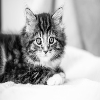

In [46]:
new_img